## Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.00,NaN,1,1,0,0,0,2,102


In [4]:
df.shape

(3803, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.00,NaN,1,1,0,0,0,2,102


# **Property_type**

In [9]:
df['property_type'].isnull().sum()

0

<AxesSubplot:>

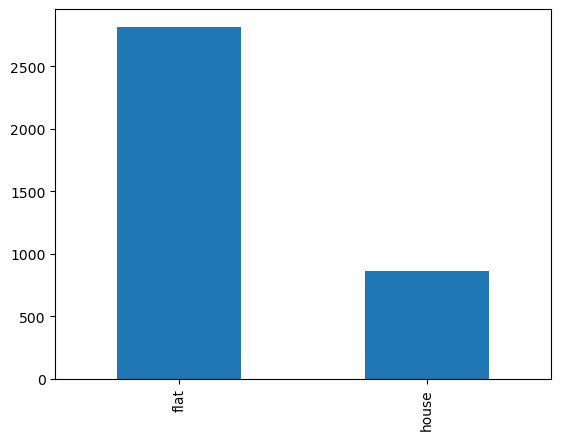

In [10]:
df['property_type'].value_counts().plot(kind='bar')

## **Observations**
* Flats are in majority(75%) and there are less number than of houses(~25%)
* No missing values

# **Society**

In [11]:
df['society'].value_counts().shape

(676,)

In [12]:
df['society'].value_counts()

independent                                     486
tulip violet                                     75
ss the leaf                                      73
shapoorji pallonji joyville gurugram             42
dlf new town heights                             42
                                               ... 
central park resort belgravia residences          1
landmark house                                    1
the khushboo cooperative housing society ltd      1
on request                                        1
baani city center                                 1
Name: society, Length: 676, dtype: int64

In [13]:
df[df['society']!= 'independent']['society'].value_counts(normalize=True).cumsum().head()

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
Name: society, dtype: float64

In [14]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins



{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<AxesSubplot:>

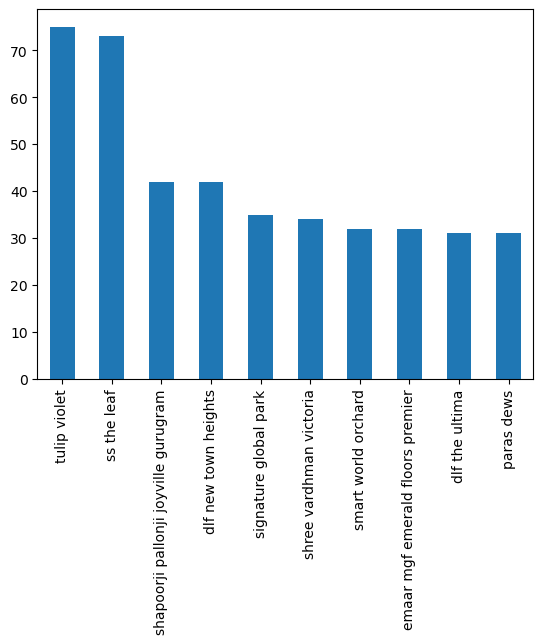

In [15]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [16]:
df['society'].isnull().sum()

1

In [17]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
919,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


#  **Observations:**
* There are 676 socities in Dataset
* The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
* Very High (>100): Only 1 society has more than 100 listings.
* High (50-100): 2 societies have between 50 to 100 listings.
* Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
* Low (2-9): 273 societies have between 2 to 9 listings.
* Very Low (1): A significant number, 308 societies, have only 1 listing.

* 1 missing value

# **sector**

In [18]:
# unique sectors
df['sector'].value_counts().shape

(113,)

<AxesSubplot:>

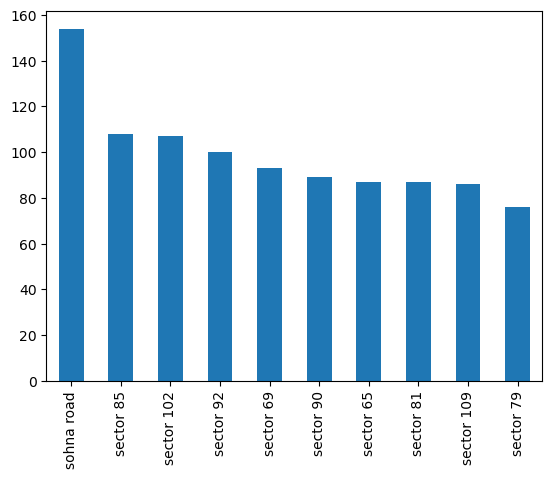

In [19]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [20]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

### **Observations**
* There are a total of 104 unique sectors in the dataset.
* Frequency distribution of sectors:
** Very High (>100): 3 sectors have more than 100 listings.
** High (50-100): 25 sectors have between 50 to 100 listings.
** Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
** Low (2-9): 16 sectors have between 2 to 9 listings.
** Very Low (1): Interestingly, there are no sectors with only 1 listing.

## **Price**

In [21]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

### **Descriptive Statistics**
* Count: There are 3,660 non-missing price entries.
* Mean Price: The average price is approximately 2.53 crores.
* Median Price: The median (or 50th percentile) price is 1.52 crores.
* Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
* Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
* IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

<AxesSubplot:xlabel='price', ylabel='Count'>

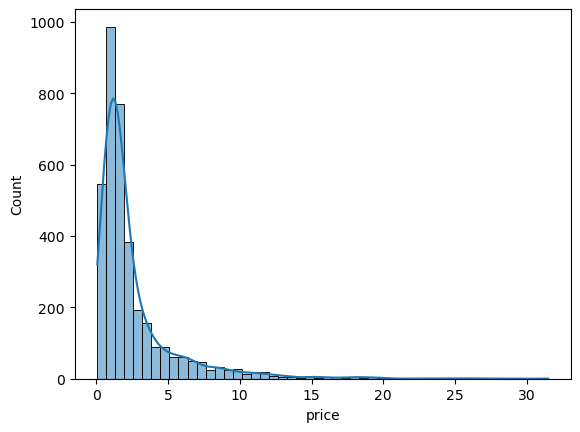

In [22]:
sns.histplot(df['price'], kde=True, bins=50)

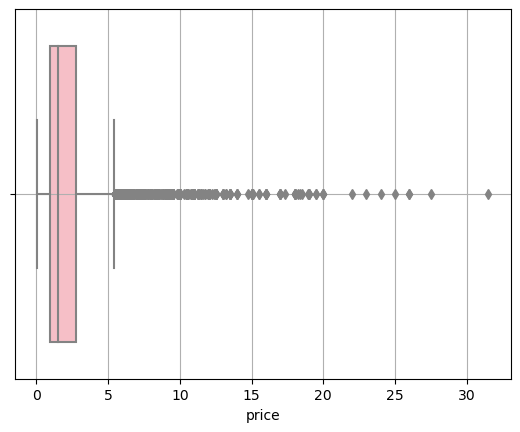

In [23]:
sns.boxplot(x=df['price'], color='lightpink')
plt.grid()

In [24]:
df['price'].isnull().sum()

17

### **Visualizations:**

* Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
* Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

Missing Values: There are 17 missing values in the price column.

In [25]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.27917047331346 14.933372629214247


* **Skewness:** The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.
* **Kurtosis:** The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.
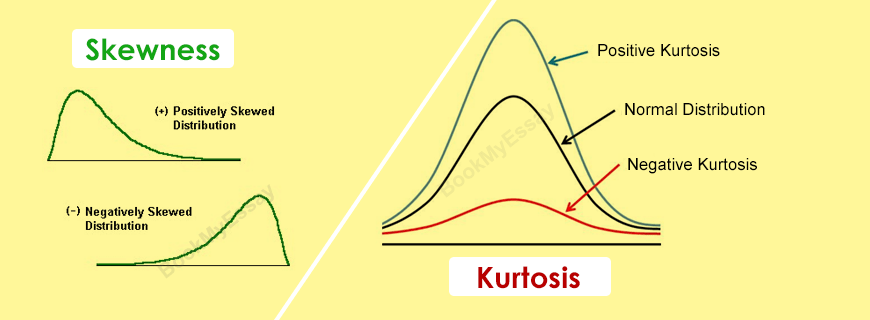

In [26]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

### **Quantile Analysis:**

* 1% Quantile: Only 1% of properties are priced below 0.25 crores.
* 5% Quantile: 5% of properties are priced below 0.37 crores.
* 95% Quantile: 95% of properties are priced below 8.5 crores.
* 99% Quantile: 99% of properties are priced below 15.26 crores indicating that very few properties are priced above this value.

In [27]:
# Identidy Potential ouliers with IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

IQR = Q3 - Q1

IQR

1.8

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [29]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [30]:
outliers.shape

(425, 23)

In [31]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

### **Outliers Analysis (using IQR method):**

* Based on the IQR method, there are 425 properties considered as outliers.
* These outliers have an average price of approximately 9.24 crores.
* The range for these outliers is from 5.46 crores to 31.5 crores.

<AxesSubplot:>

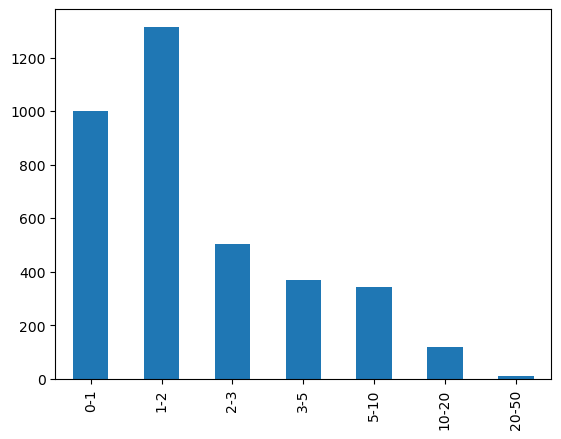

In [32]:
# Price Binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']

pd.cut(df['price'],bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

* The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
* There's a significant drop in the number of properties priced above "5 crores."

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.00,NaN,1,1,0,0,0,2,102


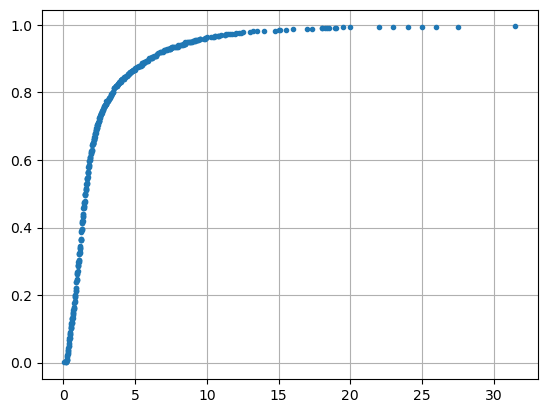

In [34]:
# Empirical Cumulative Distribution Function (ECDF) plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

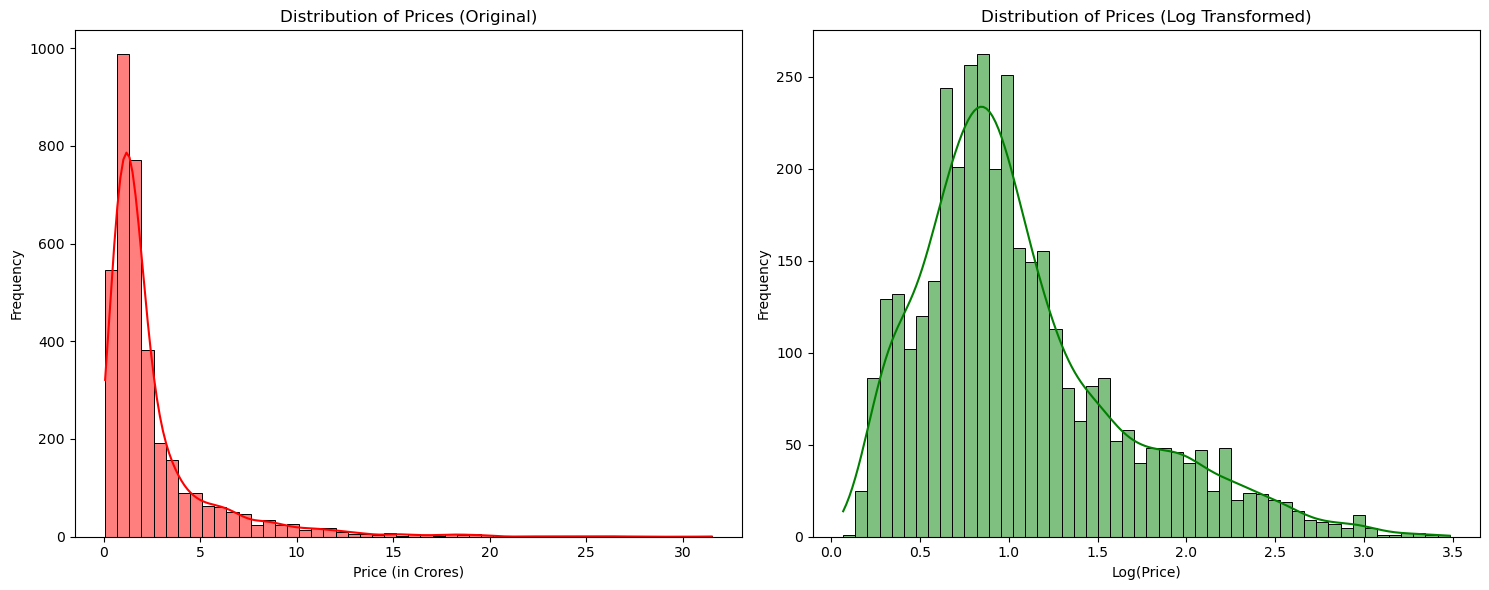

In [35]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='Red')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='green')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

* Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [36]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255313 0.9646692415449274


C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


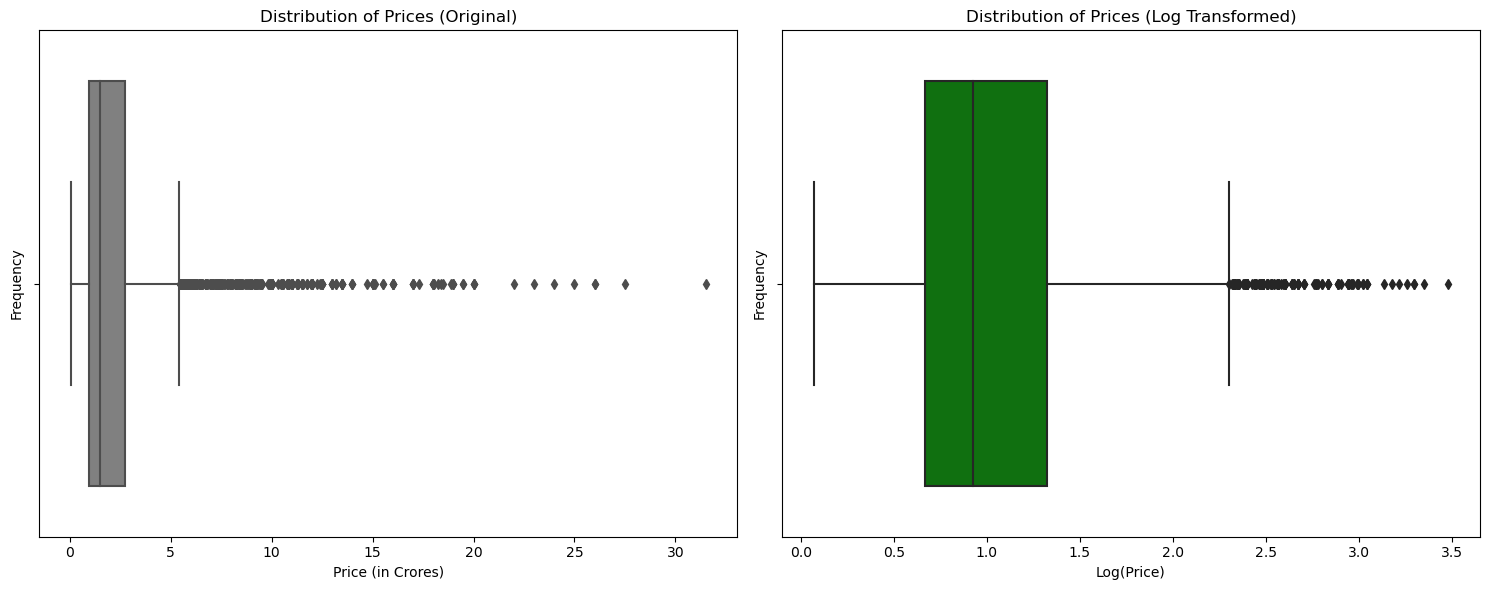

In [37]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='grey')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='green')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **price_per_sqft**

In [38]:
df['price_per_sqft'].isnull().sum()

17

In [39]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

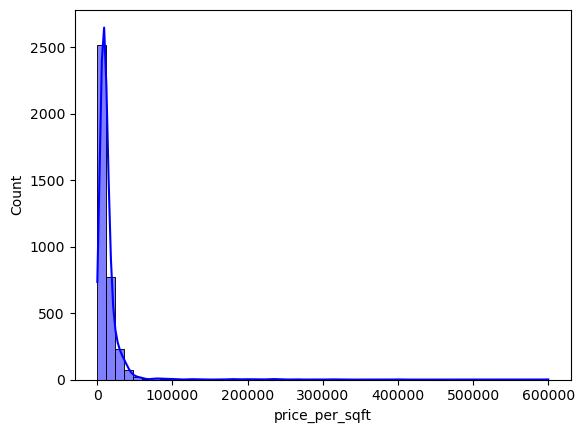

In [40]:
sns.histplot(df['price_per_sqft'], bins=50, color='blue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

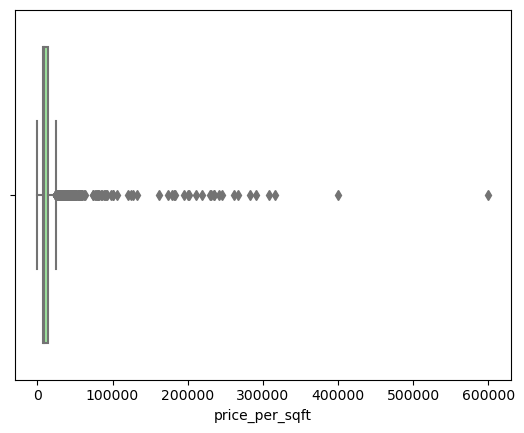

In [41]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

### **Observations**
* Potential Outliers
* Right Skewed
* 17 missing values

## **bedRoom**

In [42]:
df['bedRoom'].isnull().sum()

0

<AxesSubplot:>

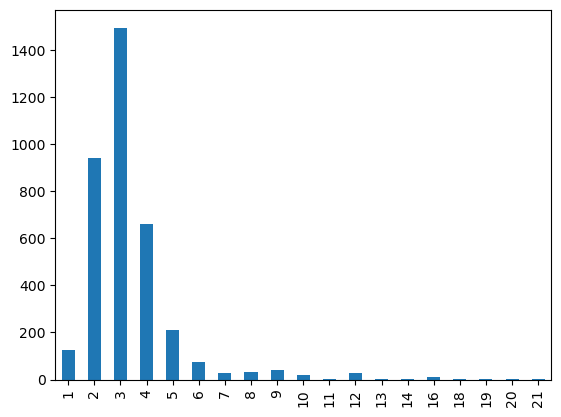

In [43]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='bedRoom'>

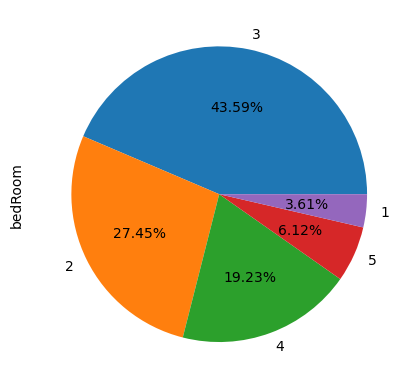

In [44]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### **Observation**
* in bedroom there is no null values
* we have three bedroom in many flats and houses
* maximum 21 bedroom is present

## **bathroom**

In [45]:
df['bathroom'].isnull().sum()

0

<AxesSubplot:>

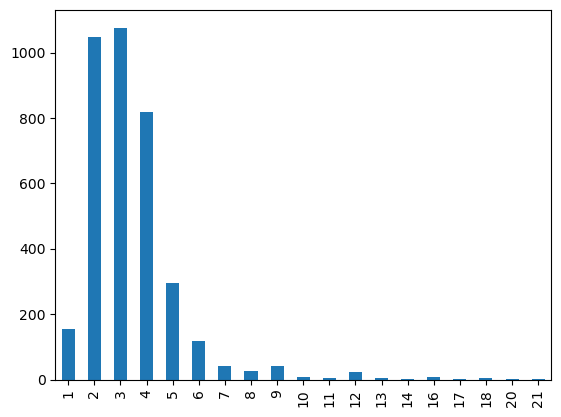

In [46]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='bathroom'>

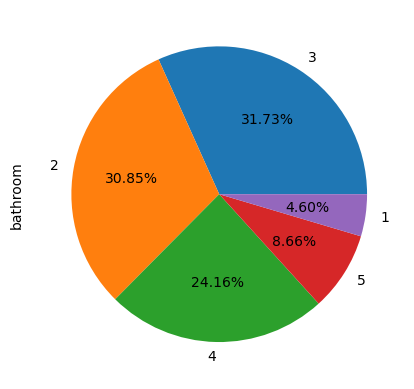

In [47]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [48]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.00,NaN,1,1,0,0,0,2,102


## **balcony**

In [49]:
df['balcony'].isnull().sum()

0

<AxesSubplot:>

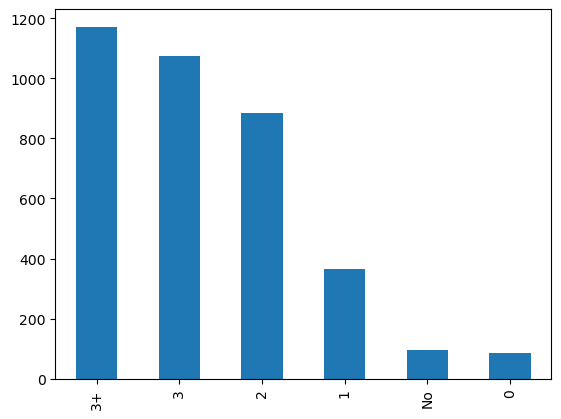

In [50]:
df['balcony'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='balcony'>

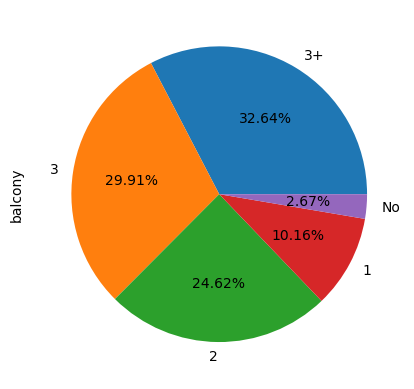

In [51]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.00,NaN,1,1,0,0,0,2,102


## **floorNum**

In [53]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,11.0,NaN,New Property,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,14.0,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2,21.0,East,Relatively New,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,2.0,North-East,Old Property,NaN,359.00,NaN,1,1,0,0,0,2,102


In [55]:
df['floorNum'].isnull().sum()

19

In [59]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<AxesSubplot:>

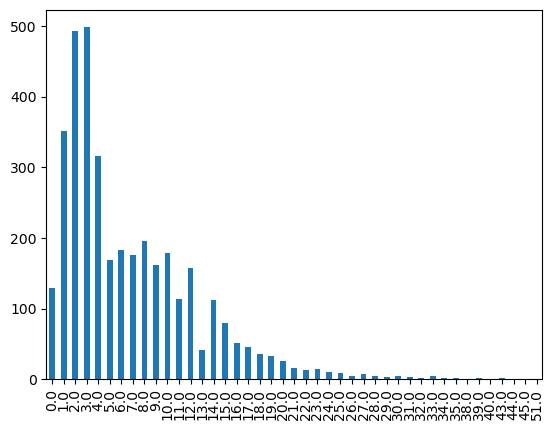

In [60]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

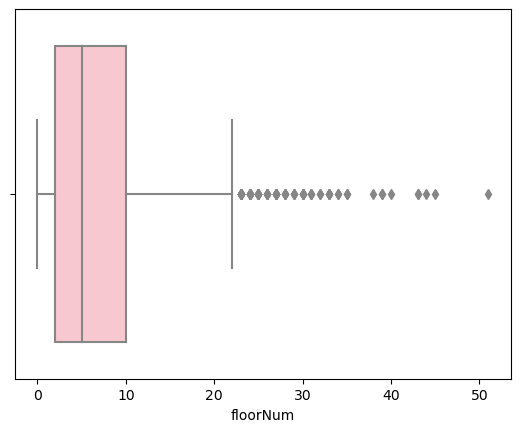

In [61]:
sns.boxplot(df['floorNum'],color='pink')

* In FloorNum column, there are 19 null values
* There are maximum 51 floor as shown in Statatistical anlysis.
* the majority of the properties lie between the ground floor(0) and 25th floor.
* floors 1 to 4 are particularly common, with 3rd floor being the most frequent.
* The box plot revels that the majority of the properties are concentrated around the lower floors. The intrqurtile range (IQR) lies between approximently the 2nd and 10 th floors.
* Data points beyound the whiskers of the box plot, especially on the higher side, indicate outliers.

## **facing**

In [63]:
df.iloc[:,11:].head()

,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,NaN,New Property,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2,East,Relatively New,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,North-West,Moderately Old,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,North-East,Old Property,NaN,359.00,NaN,1,1,0,0,0,2,102


In [62]:
df['facing'].isnull().sum()

1045

In [64]:
df['facing'].fillna('NA',inplace=True)

In [65]:
df.iloc[:,11:].head()

,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,NA,New Property,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,NA,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2,East,Relatively New,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,North-West,Moderately Old,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,North-East,Old Property,NaN,359.00,NaN,1,1,0,0,0,2,102


In [66]:
df['facing'].value_counts()

NA            1045
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

## **agePossession**

In [69]:
df['agePossession'].head()

0      New Property
1    Relatively New
2    Relatively New
3    Moderately Old
4      Old Property
Name: agePossession, dtype: object

In [67]:
df['agePossession'].isnull().sum()

0

In [68]:
df['agePossession'].value_counts()

Relatively New        1646
New Property           593
Moderately Old         563
Undefined              446
Old Property           303
Under Construction     126
Name: agePossession, dtype: int64

## **areas** : super_built_up_area,	built_up_area,	carpet_area

In [74]:
df.iloc[:,13:].head()

,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,569.0,NaN,NaN,0,0,0,0,0,0,38
2,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,NaN,359.00,NaN,1,1,0,0,0,2,102


**1. super_built_up_area**

In [78]:
df['super_built_up_area'].isnull().sum()

1802

In [73]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot:xlabel='super_built_up_area', ylabel='Count'>

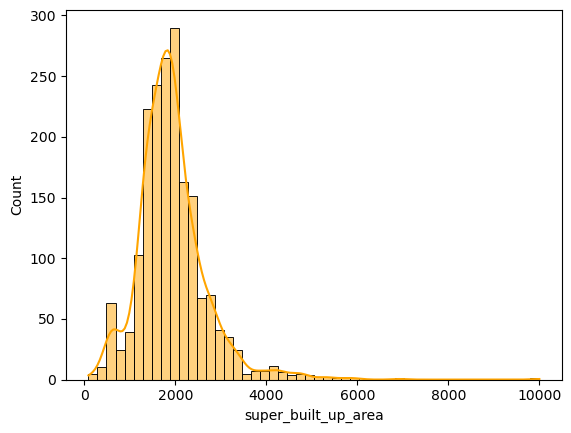

In [75]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='orange', kde=True)

C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='super_built_up_area'>

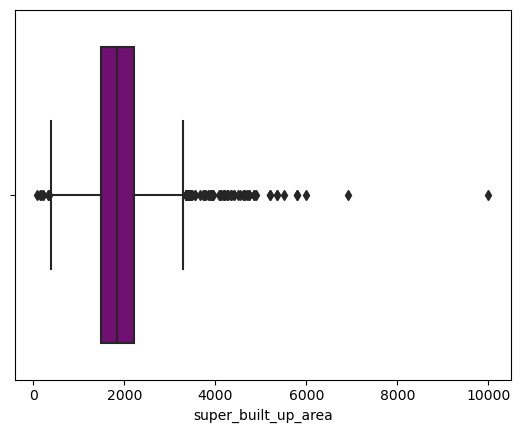

In [77]:
sns.boxplot(df['super_built_up_area'].dropna(),color='purple')

* Most properties have super build up area ranging between approximently 1000 sq.ft. and 2500 sq.ft.
* There are few properties with significantly larger area,leading to a right skewed distribution.
* the IQR lies between 1479.500000 to  2215.000000 sqft. indicating that the middle 50% of the properties fall within this range
* there are several data points thewhich is beyound the whisker plot,indicating potential Outliers.

**2. Build up area**

In [79]:
df['built_up_area'].isnull().sum()

1987

In [80]:
df['built_up_area'].describe()

count      1690.000000
mean       1841.931378
std       17945.374399
min           2.000000
25%         360.000000
50%        1256.500000
75%        1900.000000
max      737147.000000
Name: built_up_area, dtype: float64

<AxesSubplot:xlabel='built_up_area', ylabel='Count'>

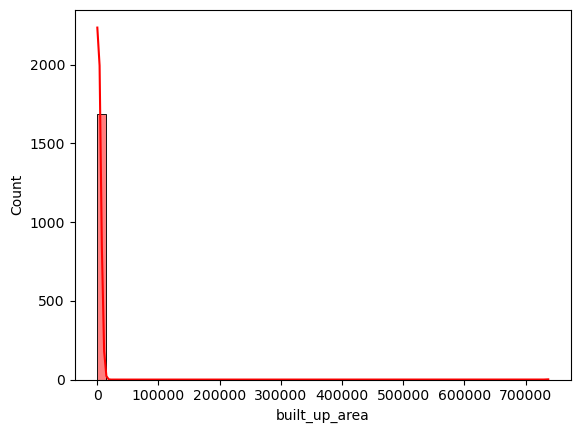

In [81]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='red', kde=True)

C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area'>

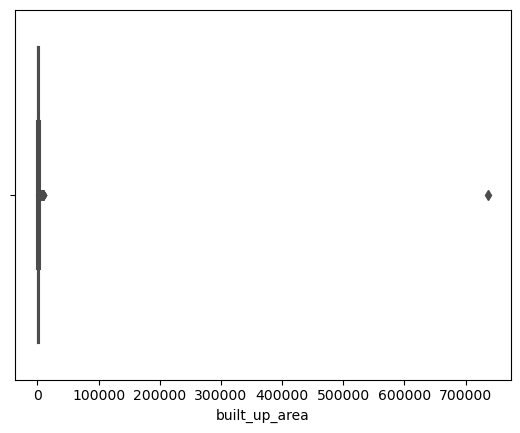

In [82]:
sns.boxplot(df['built_up_area'].dropna(), color='orange')

*  IQR shows that most of the built up area ranging from 360 to 1900 sq.ft
* there are very few properties with much larger build_up_area, leading to highly righjt_skewd distribution
* box plot shows occurance of some Outliers in Build up area

The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

**3. Carpet Area**

In [83]:
df['carpet_area'].isnull().sum()

1805

<AxesSubplot:xlabel='carpet_area', ylabel='Count'>

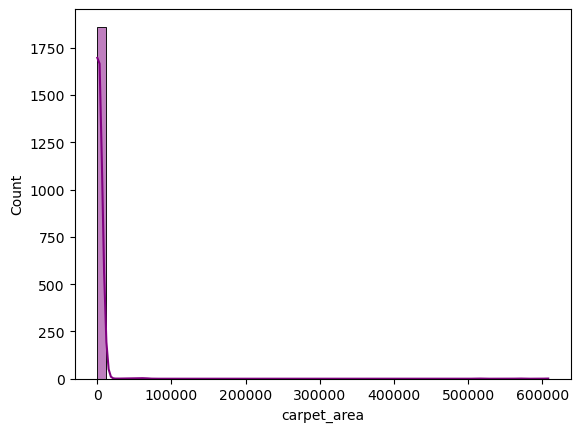

In [85]:
sns.histplot(df['carpet_area'].dropna(),bins=50 ,color='purple', kde=True)

C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carpet_area'>

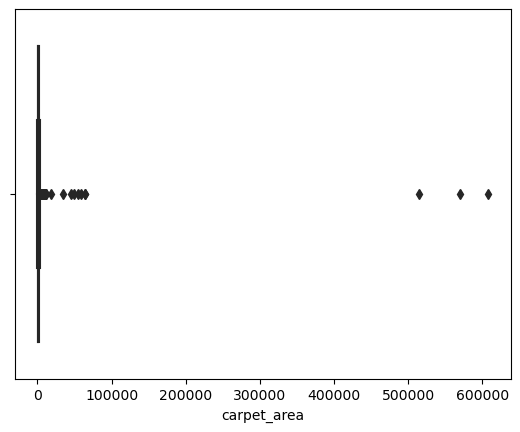

In [86]:
sns.boxplot(df['carpet_area'].dropna(), color='green')

In [87]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,37
1,0,0,0,0,0,0,38
2,0,1,0,0,0,0,150
3,1,0,0,0,0,2,75
4,1,1,0,0,0,2,102
...,...,...,...,...,...,...,...
3798,0,1,0,0,0,2,152
3799,0,1,0,0,0,2,165
3800,1,1,1,1,0,2,0
3801,0,0,0,0,0,0,0


## additional rooms

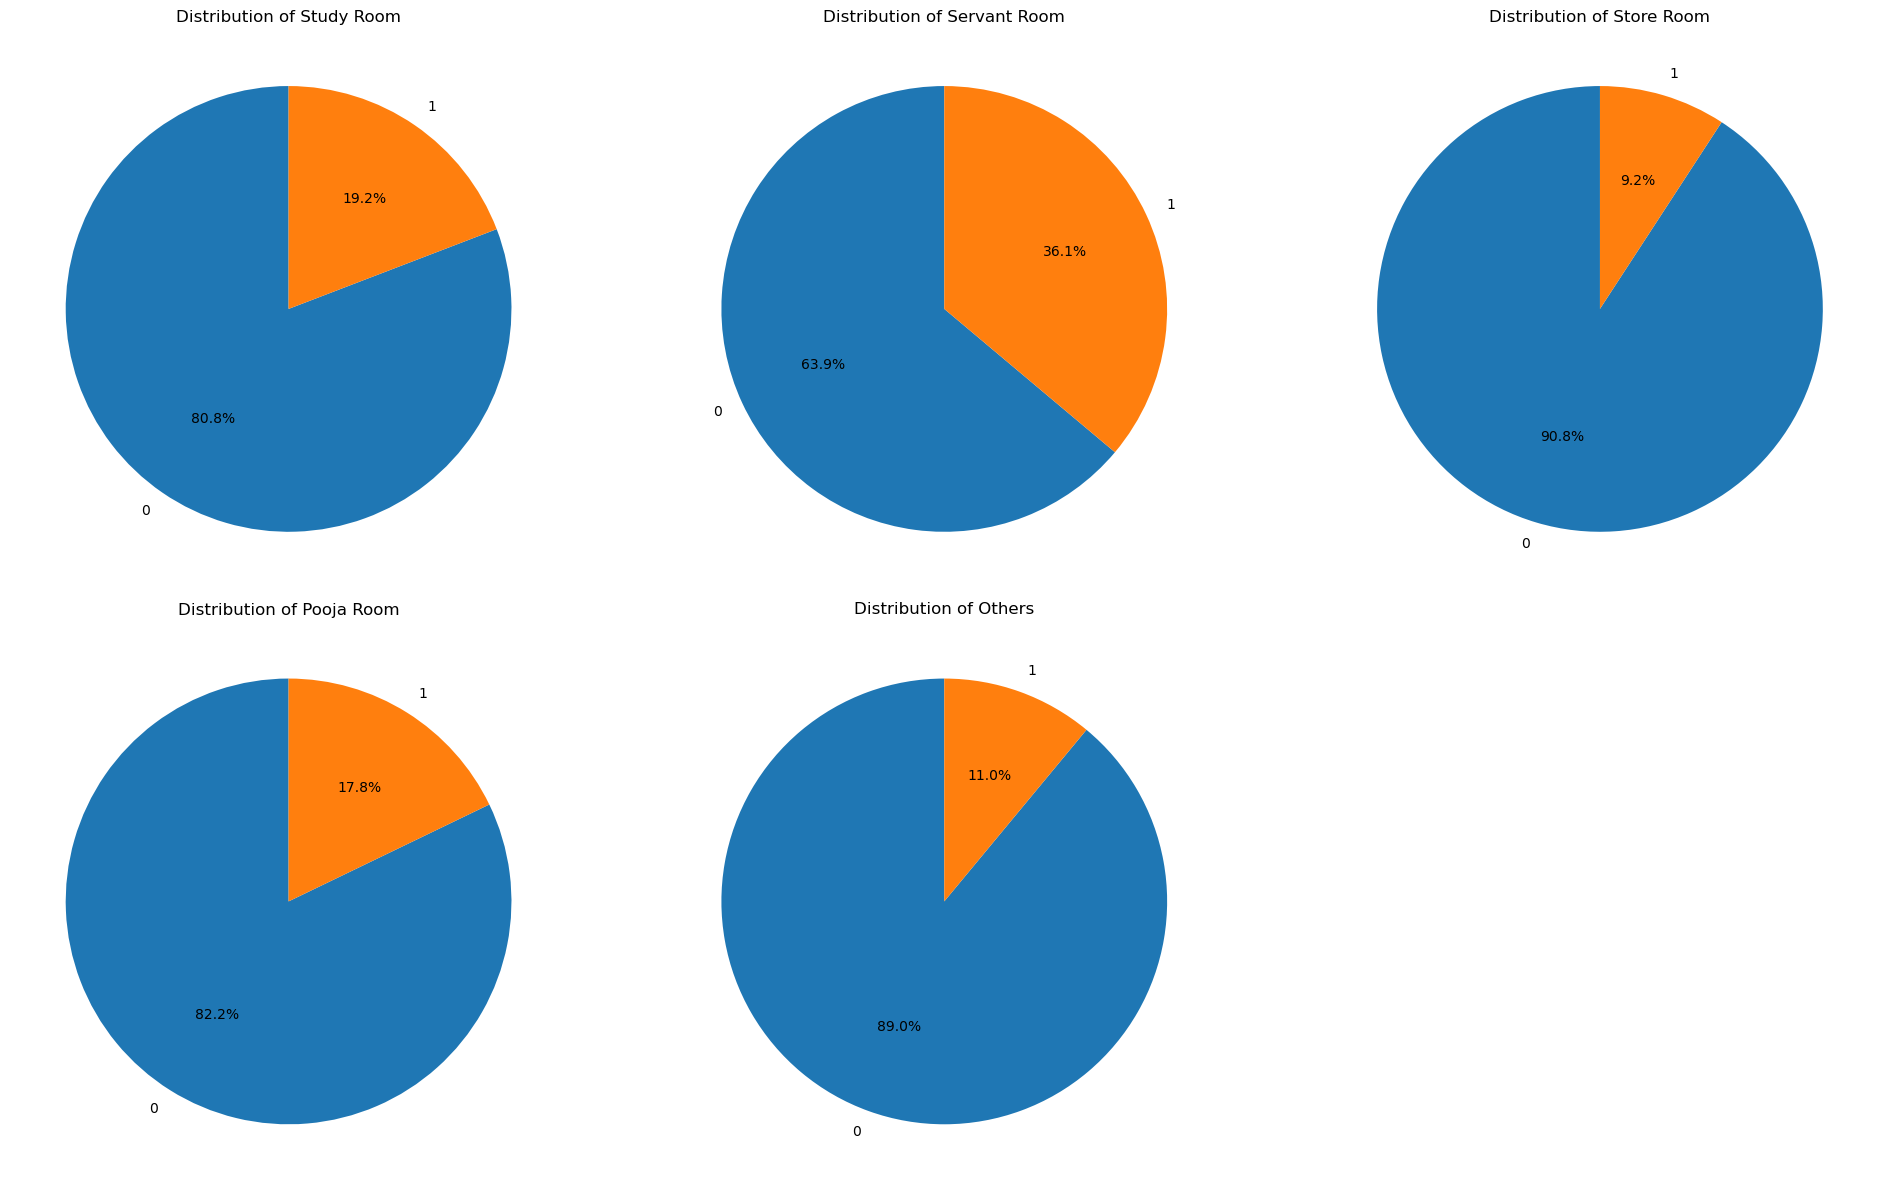

In [89]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## furnishing_type

In [90]:
df['furnishing_type'].value_counts()

0    2404
2    1061
1     212
Name: furnishing_type, dtype: int64

<AxesSubplot:ylabel='furnishing_type'>

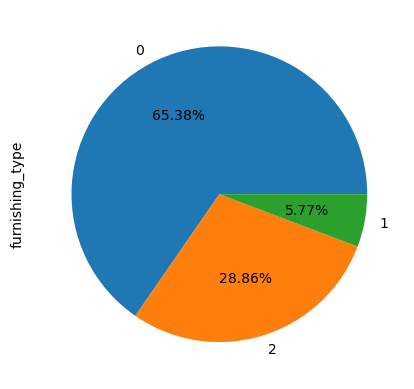

In [92]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

## luxary score

In [94]:
df['luxury_score'].isnull().sum()

0

In [95]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<AxesSubplot:xlabel='luxury_score', ylabel='Count'>

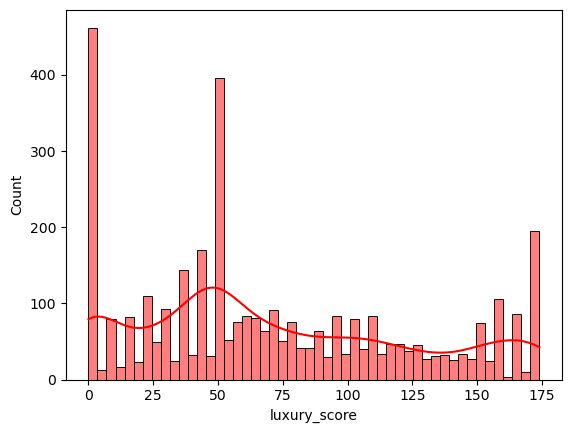

In [96]:
sns.histplot(df['luxury_score'], bins=50, color='red', kde =True)

C:\Users\disha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

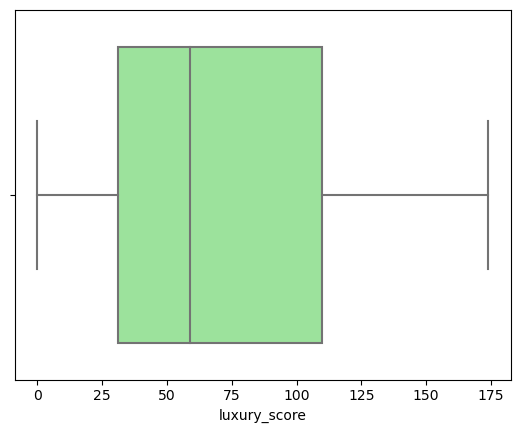

In [97]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [98]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.00,NaN,1,1,0,0,0,2,102
